# Ejercicio Covid-19

In [158]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Actualizar submodule: git submodule update

In [153]:
# Datos https://github.com/CSSEGISandData/COVID-19.git
data = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv" )
data.sample(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
121,District of Columbia,US,38.8974,-77.0268,0,0,0,0,0,0,...,10,10,10,16,22,22,31,40,71,77
77,NaN,South Africa,-30.5595,22.9375,0,0,0,0,0,0,...,17,24,38,51,62,62,116,150,202,240
64,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,45,86,103,103,118,171,171,274,344,392


In [154]:
# Número de Países diferentes
print(data['Country/Region'].nunique())

166


In [155]:
#Saco un dataset con solo los países
data_countries = data.groupby("Country/Region", as_index=False).sum()
#Se ve que están todos y comprobado que suma
data_countries[::]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,7,7,11,16,21,22,22,22,24,24
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,23,33,38,42,51,55,59,64,70,76
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,24,26,37,48,54,60,74,87,90,139
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,1,1,1,1,2,39,39,53,75,88
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,0,...,0,0,0,1,6,10,15,23,33,43
162,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,...,0,0,2,10,17,33,36,42,42,70
163,Vietnam,16.0000,108.0000,0,2,2,2,2,2,2,...,39,47,53,56,61,66,75,85,91,94
164,Zambia,-15.4167,28.2833,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2


In [156]:
# Hago transposición de los datos para mover las columnas en filas 
data_trans = data_countries.set_index('Country/Region').transpose()
# Y me quedo sólo con los datos temporales y número de casos
data_time = data_trans[2:]
data_time.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [124]:
# Cogemos solo determinados países
data_time = data_time[['China', 'France', 'Germany', 'Iran','Italy', 'Korea, South', 'Norway','Spain', 'US', 'United Kingdom']]

# Para coger los países que en día 20 tienen más de 1000 casos: data_countries = data_countries[data_countries["3/17/20"] >= 1000 ]
data_time.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
1/22/20,548.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1/23/20,643.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [125]:
#Convierto la columna fecha en datetime
from datetime import date
data_time.index = pd.to_datetime(data_time.index)
data_time.head()

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-01-22,548.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-01-23,643.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-01-24,920.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2020-01-25,1406.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2020-01-26,2075.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0


In [185]:
# Coger solo datos del último mes
data_time_filter = data_time[-30:]
# Si quiero quitar China: data_time_filter = data_time_filter.drop('China', axis=1)
data_time_filter.head(2)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2/21/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,...,0.0,0.0,9.0,9.0,0.0,0.0,0.0,16.0,0.0,0.0
2/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,...,0.0,0.0,13.0,9.0,0.0,0.0,0.0,16.0,0.0,0.0


In [127]:
#Hago listado de Countries
list_countries = data_time_filter.columns
list_countries

Index(['China', 'France', 'Germany', 'Iran', 'Italy', 'Korea, South', 'Norway',
       'Spain', 'US', 'United Kingdom'],
      dtype='object', name='Country/Region')

In [128]:
'''Vamos a hacer un gráfico para ver los casos confirmados (desde caso 100)'''

#Exporto los datos en diferentes arhcivos con casa país
for country in list_countries:
    dataX = data_time_filter[country]
    dataX = dataX[dataX > 100]
    dataX.to_csv('data_' + country + ".csv", index=False, header= country)

# from glob import glob
# filenames = glob('*.csv')
# dataframes = [pd.read_csv(f) for f in filenames]
# dataframes

# Quitar fechas de index, y ponerlo con número
# data_time_filter = data_time_filter.reset_index(drop=True)
# data_time_filter

In [138]:
# Creamos los CSV
dataframe_France = pd.read_csv('data_France.csv')
dataframe_China = pd.read_csv('data_China.csv')
dataframe_Germany = pd.read_csv('data_Germany.csv')
dataframe_Iran = pd.read_csv('data_Iran.csv')
dataframe_Italy = pd.read_csv('data_Italy.csv')
dataframe_Korea = pd.read_csv('data_Korea, South.csv')
dataframe_Norway = pd.read_csv('data_Norway.csv')
dataframe_Spain = pd.read_csv('data_Spain.csv')
dataframe_US = pd.read_csv('data_US.csv')
dataframe_UnitedKingdom = pd.read_csv('data_United Kingdom.csv')

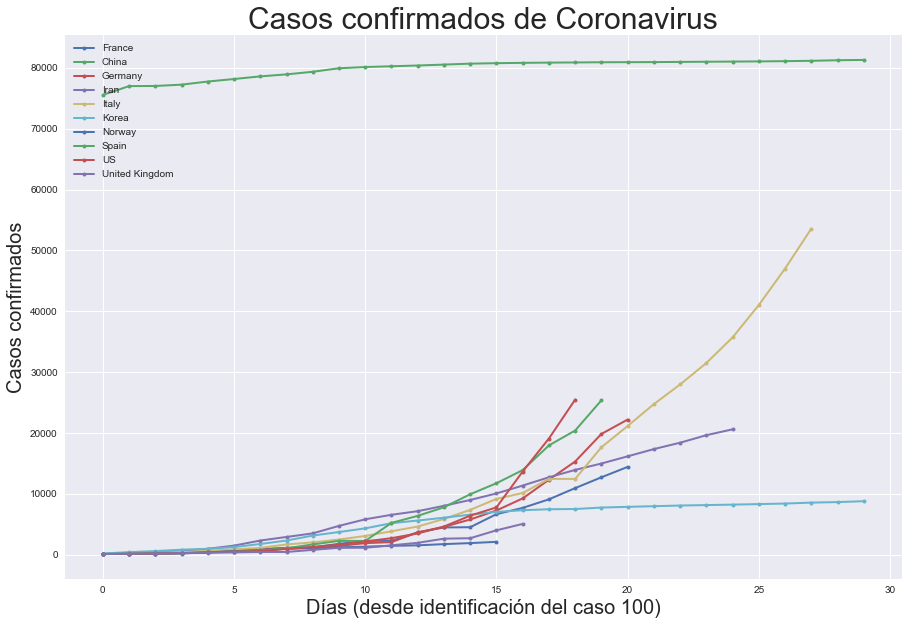

In [145]:
# Lo ploteo
plt.plot(dataframe_France, label='France', marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_China, label='China',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Germany, label='Germany' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Iran, label='Iran',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Italy, label='Italy',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Korea, label='Korea' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Norway, label='Norway' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Spain, label='Spain' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_US, label='US' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_UnitedKingdom, label='United Kingdom',marker='o', markersize=4, linewidth=2)

plt.legend(loc='upper left', frameon=False, fancybox=True)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})

plt.xlabel("Días (desde identificación del caso 100)", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})
plt.show()

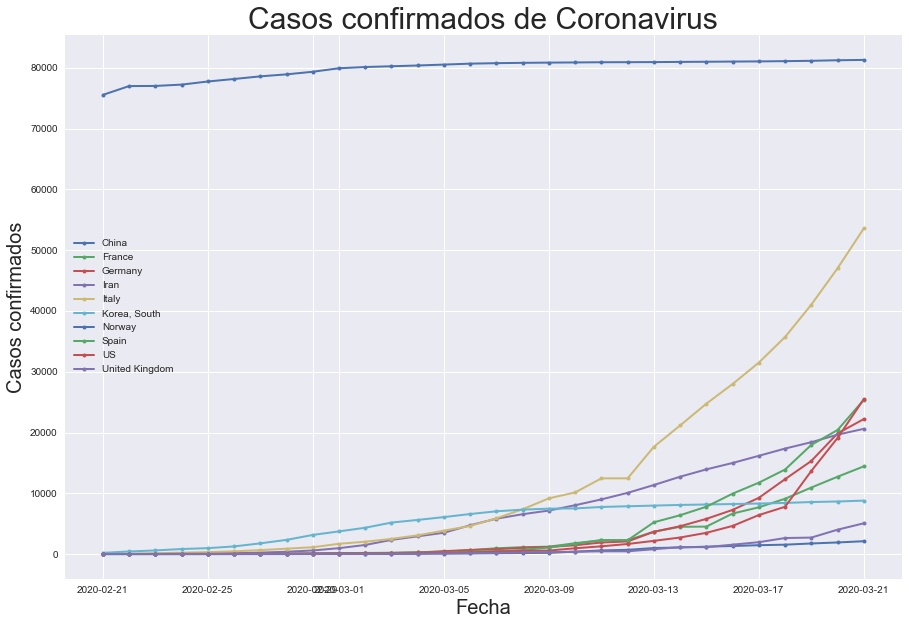

In [152]:
'''Vamos a hacer un gráfico para ver los casos confirmados por fechas'''
plt.plot(data_time_filter, label='France', marker='o', markersize=4, linewidth=2)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})
plt.xlabel("Fecha", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})
plt.legend(list_countries)

plt.show()


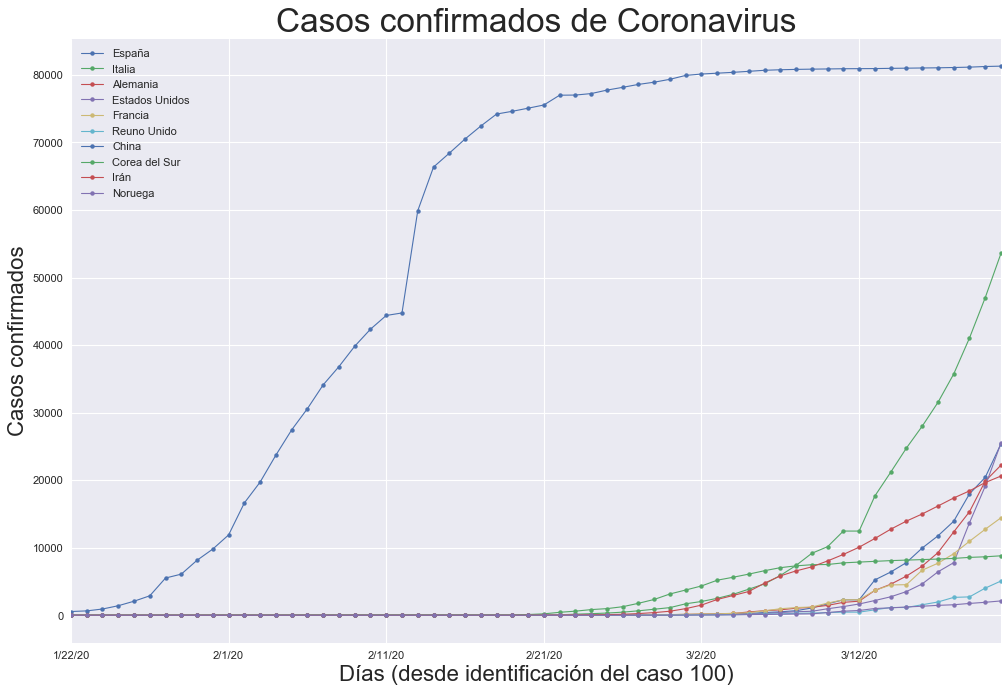

In [171]:
# Otra forma

fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

legend = []

data_time.loc[:,'Spain'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('España')
data_time.loc[:,'Italy'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Italia')
data_time.loc[:,'Germany'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Alemania')
data_time.loc[:,'US'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Estados Unidos')
data_time.loc[:,'France'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Francia')
data_time.loc[:,'United Kingdom'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Reuno Unido')
data_time.loc[:,'China'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('China')
data_time.loc[:,'Korea, South'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Corea del Sur')
data_time.loc[:,'Iran'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Irán')
data_time.loc[:,'Norway'].plot.line(marker="o", linewidth=1, markersize=4)
legend.append('Noruega')


plt.legend(legend)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})

plt.xlabel("Días (desde identificación del caso 100)", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})

plt.show()

## Preparar para subir a DRIVE

In [315]:
#Exportar CSV por días progresivos
data_drive_days = data_time_filter.loc[:,list_countries]
data_drive_days.to_csv('covid19_data_drive_days.csv', sep = ';', encoding="utf-8")
data_drive_days.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2/21/20,75550.0,12.0,16.0,18.0,20.0,204.0,0.0,2.0,15.0,9.0
2/22/20,77001.0,12.0,16.0,28.0,62.0,433.0,0.0,2.0,15.0,9.0


In [311]:
# Rellenar los 0 por NaN y expoertar
data_drive_from100 = data_time_filter.loc[:,list_countries].copy()
data_drive_from100 = data_drive_from100.replace(0, 'null')
#Exportar CSV desde caso 100
data_drive_from100.to_csv('covid19_data_drive_from100.csv', sep = ';')
data_drive_from100.head(2)

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2/21/20,75550.0,12.0,16.0,18.0,20.0,204.0,null,2.0,15.0,9.0
2/22/20,77001.0,12.0,16.0,28.0,62.0,433.0,null,2.0,15.0,9.0


## Opción para subir archivos al DRIVE

In [213]:
'''Conectando con el DRIVE'''
# https://towardsdatascience.com/how-to-manage-files-in-google-drive-with-python-d26471d91ecd
# !pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
# !pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth() # client_secrets.json need to be in the same directory as the script
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=58971579011-eee528qobf8hqh42o94galvgh24s0eem.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [316]:
'''Primero borro los archivos que hay'''

fileList = drive.ListFile({'q': "'15f-P5KEjNMW3H3KmkV7W38o3l-mm-Vt3' in parents and trashed=false"}).GetList()
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))
   # Get the folder ID that you want
  if(file['title'] == "Covid-19_excels"):
      fileID = file['id']
  
# Initialize GoogleDriveFile instance with file id.
file1 = drive.CreateFile({'id': fileID})
file1.SetContentFile("covid19_data_drive_from100.csv")
file2.Delete()  # Permanently delete the file.
print('Deleted file 1 %s with mimeType %s' % (file2['title'], file2['mimeType']))
file3.Delete()  # Permanently delete the file.
print('Deleted file 2 %s with mimeType %s' % (file3['title'], file3['mimeType']))


Deleted file 1 covid19_data_drive_days.csv with mimeType text/csv
Deleted file 2 covid19_data_drive_from100.csv with mimeType text/csv


In [317]:
'''Para subir los archivos al drive'''

# View all folders and file in your Google Drive
fileList = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))
  # Get the folder ID that you want
  if(file['title'] == "Covid-19_excels"):
      fileID = file['id']
      
file2 = drive.CreateFile({"mimeType": "text/csv", "parents": [{"kind": "drive#fileLink", "id": fileID}]})
file2.SetContentFile("covid19_data_drive_days.csv")
file2.Upload() # Upload the file.
print('Created file 1 %s with mimeType %s' % (file1['title'], file1['mimeType']))

file3 = drive.CreateFile({"mimeType": "text/csv", "parents": [{"kind": "drive#fileLink", "id": fileID}]})
file3.SetContentFile("covid19_data_drive_from100.csv")
file3.Upload() # Upload the file.
print('Created file 2 %s with mimeType %s' % (file2['title'], file2['mimeType']))

Title: Colab Notebooks, ID: 1l_i4D7zC0N0jB8n0QV32l1CRHENPVSuZ
Title: Covid-19_excels, ID: 1il3Z0N2CVf5qJy3yxzR8VnH37dwDKbMx
Created file 1 covid19_data_drive_from100.csv with mimeType text/csv
Created file 2 covid19_data_drive_days.csv with mimeType text/csv


## Opción para subir archivos desde FTP

In [ ]:
# https://www.atlantic.net/hipaa-compliant-cloud-storage/how-to-ftp-uploads-python/

'''Me quedé en:
- Para gráfica continua: Seleccionar muchos más días, que salga también China, su proceso.
- Para gráfica 100 casos: Reindexar fecha columna 0 con reindex para poner Día 1, Día 2...
- Ver cómo conectar vía FTP con mi web para subir archivos automáticamente
- Diseñar en DataWrapper
- Subir a wordpress.

'''

## Modelado de AR

In [367]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_time_spain, order = (2, 0, 0)).fit() 

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [368]:
prediction = model.get_forecast(steps = 12)

In [369]:
prediction.conf_int().head()

,lower Spain,upper Spain
2020-03-18,12042.527967,13854.387740
2020-03-19,11934.537739,15500.931338
2020-03-20,11524.015048,16836.909587
2020-03-21,10936.958034,17914.478768
2020-03-22,10251.730359,18782.587668


In [370]:
prediction.predicted_mean.head()

2020-03-18    12948.457854
2020-03-19    13717.734538
2020-03-20    14180.462318
2020-03-21    14425.718401
2020-03-22    14517.159014
Freq: D, dtype: float64

In [371]:
lower = prediction.conf_int()["lower Spain"]
upper = prediction.conf_int()["upper Spain"]

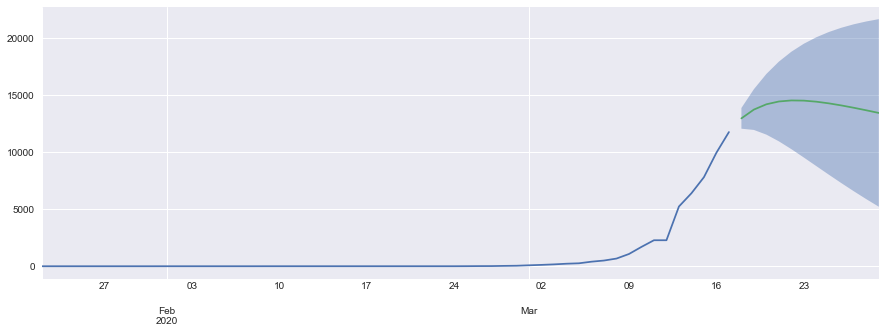

In [372]:
fig, ax = plt.subplots()
data_time_spain.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [373]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_time.Spain)

(3.410951690700507,
 1.0,
 11,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 507.2925170512722)

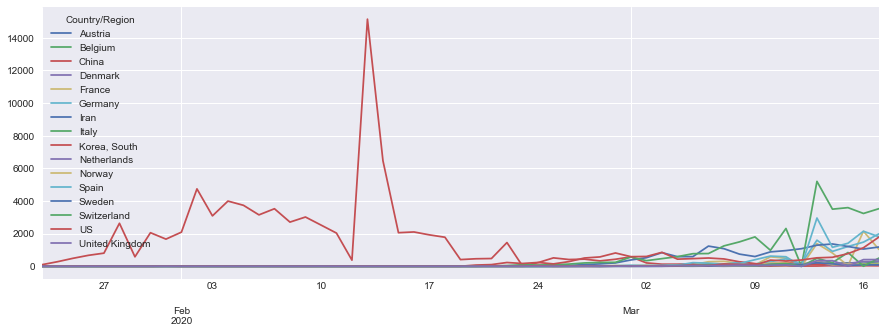

In [374]:
data_diff = data_time - data_time.shift(1)
data_diff.dropna(inplace = True)
data_diff.plot();

In [375]:
adfuller(data_diff.Spain)

(4.397045159343214,
 1.0,
 11,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 500.7439543949986)

## Modelo SARIMA

In [376]:
model = SARIMAX(data_time.Spain, order = (3, 1, 2), seasonal_order = (1, 1, 2, 12)).fit()

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [377]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower Spain"]
upper = prediction.conf_int()["upper Spain"]

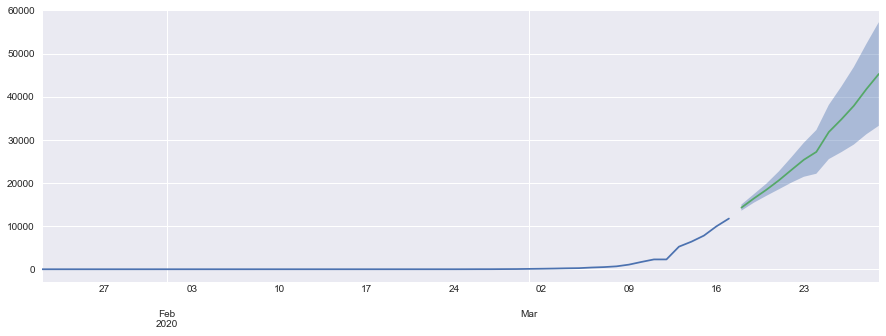

In [378]:
data_time.Spain.plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [379]:
model.resid.head()

2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
dtype: float64

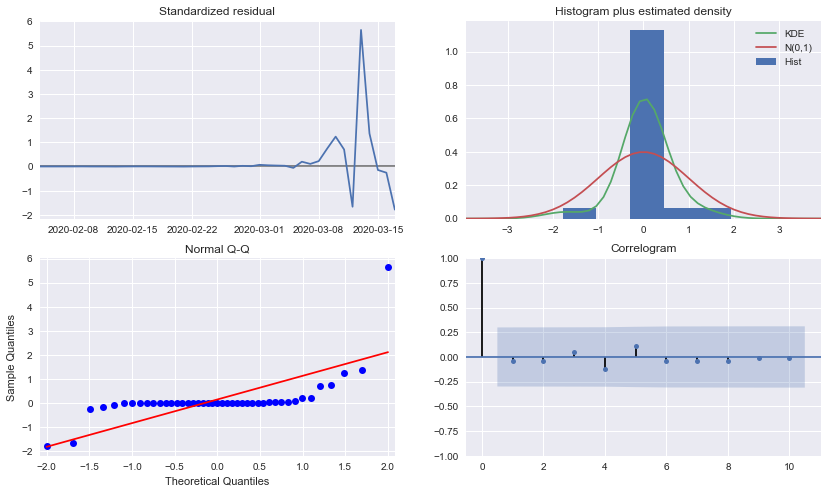

In [380]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()